# LetsGrowMore - DataScience Task2
# Fashad Ahmed Siddique
# Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [3]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.5+ KB


In [5]:
df_close = df.reset_index()['close']
df_close.head()

0    132.045
1    131.780
2    130.280
3    130.535
4    129.960
Name: close, dtype: float64

In [6]:
df_close

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

Plotting the Close stock DataFrame


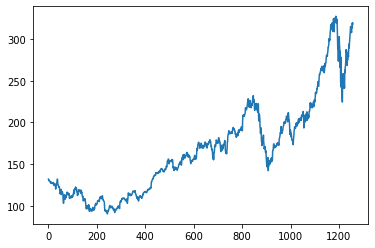

In [7]:
plt.plot(df_close)

Applying MinMax scale because LSTM is sensitive to scale of data.

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [10]:
df_close

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

Data Preprocessing

In [11]:
train_size = int(len(df_close)*0.65)
test_size = len(df_close)-train_size

In [12]:
train_data,test_data = df_close[0:train_size],df_close[train_size:len(df_close),:1]

In [13]:
train_size,test_size

(817, 441)

Converting array into dataset matrix.

In [23]:
def transfrom_to_dataset(ds, time_stamp=1):
  dataX, dataY = [], []
  for i in range(len(ds)-time_stamp-1):
    var = ds[i:(i+time_stamp),0]
    dataX.append(var)
    dataY.append(ds[i+time_stamp, 0])
  return np.array(dataX), np.array(dataY)

Reshaping into X=t,t++,t+2,t+3 and Y=t+4

In [24]:
time_stamp = 100
X_train, y_train = transfrom_to_dataset(train_data, time_stamp)
X_test, y_test = transfrom_to_dataset(test_data, time_stamp)

Inputs ae reshaped as per the requirements for LSTM

In [30]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

## **LSTM Model**

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [33]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [40]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 308ms/step - loss: 0.0146 - val_loss: 0.0550
Epoch 2/100
12/12 [==============================] - 2s 203ms/step - loss: 0.0026 - val_loss: 0.0050
Epoch 3/100
12/12 [==============================] - 2s 201ms/step - loss: 8.7096e-04 - val_loss: 0.0046
Epoch 4/100
12/12 [==============================] - 2s 200ms/step - loss: 8.0858e-04 - val_loss: 0.0046
Epoch 5/100
12/12 [==============================] - 2s 195ms/step - loss: 6.6772e-04 - val_loss: 0.0056
Epoch 6/100
12/12 [==============================] - 2s 199ms/step - loss: 6.3173e-04 - val_loss: 0.0053
Epoch 7/100
12/12 [==============================] - 2s 196ms/step - loss: 6.1816e-04 - val_loss: 0.0042
Epoch 8/100
12/12 [==============================] - 2s 202ms/step - loss: 6.4399e-04 - val_loss: 0.0039
Epoch 9/100
12/12 [==============================] - 2s 201ms/step - loss: 5.9924e-04 - val_loss: 0.0037
Epoch 10/100
12/12 [==============================] - 2s 198ms/

In [38]:
import tensorflow as tf

In [39]:
tf.__version__

'2.6.0'

Predictions

In [41]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [42]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

Performnace Metrics

In [44]:
import math
from sklearn.metrics import mean_squared_error


In [45]:
math.sqrt(mean_squared_error(y_train,train_predict))

142.26561003059953

In [47]:
math.sqrt(mean_squared_error(y_test,test_predict))

237.8588425746558

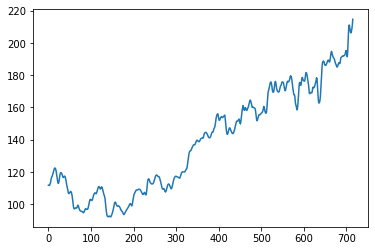

In [56]:
plt.plot(train_predict)

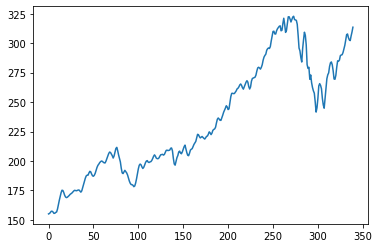

In [57]:
plt.plot(test_predict)

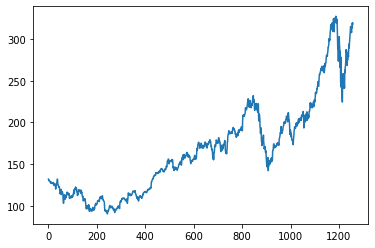

In [58]:
plt.plot(scaler.inverse_transform(df_close))